In [462]:
import pandas as pd
import numpy as np

In [463]:
df =pd.read_csv('googleplaystore.csv')
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 1. Fix Rating
Ratings must be between 1 and 5

In [465]:
df = df[(df['Rating'] >= 1.0) & (df['Rating'] <= 5.0)]

# 2. Fix Reviews
Convert Reviews to numeric

In [466]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# 3. Fix Size
Sizes have values like '19M', '14k', 'Varies with device'

In [467]:
def convert_size(size):
    if size == 'Varies with device':
        return np.nan
    size = str(size).strip()
    if size.endswith('M'):
        return float(size[:-1]) * 1_000_000
    elif size.endswith('k'):
        return float(size[:-1]) * 1_000
    else:
        return np.nan

df['Size'] = df['Size'].apply(convert_size)

# 4. Fix Installs
Remove '+' and ',' then convert to int

In [468]:
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# 5. Fix Price
Remove '$' and convert to float

In [469]:
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# 6. Fix Category
Ensure category is string, drop invalid

In [470]:
df['Category'] = df['Category'].astype(str)
df = df[df['Category'].str.len() > 0]

# 7. Fix Android Version
Replace 'Varies with device' with NaN
Keep only the first version number (e.g., '4.0.3 and up' -> '4.0.3')

In [471]:
df['Android Ver'] = df['Android Ver'].replace('Varies with device', np.nan)

df['Android Ver'] = df['Android Ver'].str.split(' ').str[0]

# 8. Handle Missing Values
Strategy: 
Fill categorical missing values with mode
Fill numeric with median

In [472]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_20076\1842323058.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_20076\1842323058.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

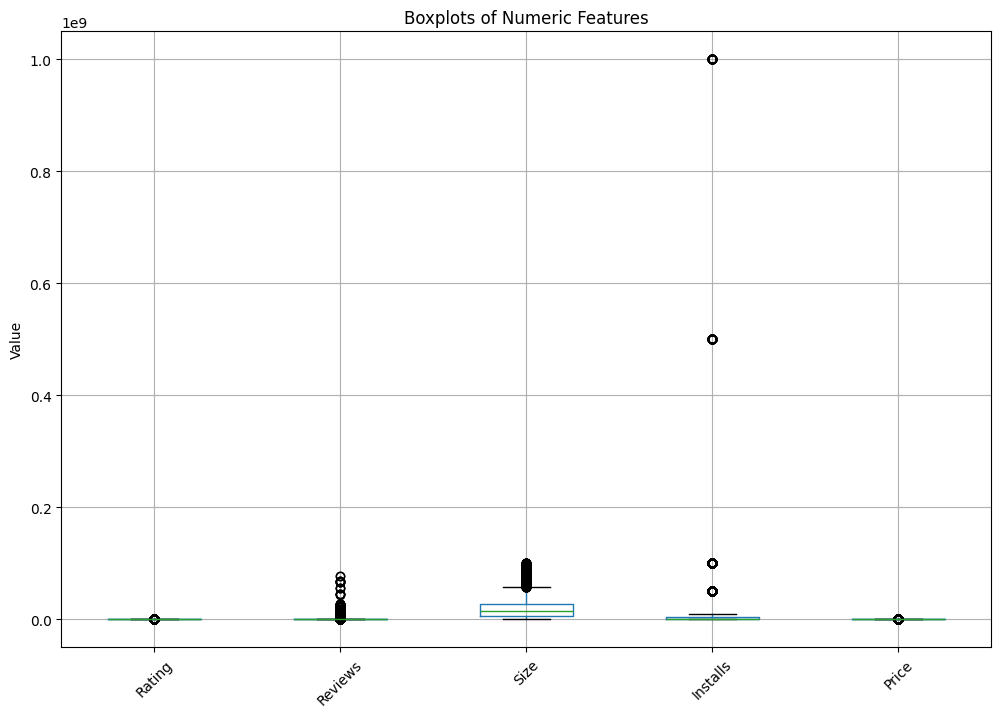

In [ ]:
import matplotlib.pyplot as plt

num_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

plt.figure(figsize=(12, 8))
df[num_cols].boxplot()
plt.title("Boxplots of Numeric Features")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()


# 10. Fix Dates

In [474]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

df.reset_index(drop=True, inplace=True)

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9366 entries, 0 to 9365
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int64         
 4   Size            9366 non-null   float64       
 5   Installs        9366 non-null   int64         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 951.4+ KB


In [476]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


## 1.	What is the most expensive app on the Play Store?

In [477]:
most_expensive = df.loc[df['Price'].idxmax(), ['App', 'Price']]
most_expensive


App      I'm Rich - Trump Edition
Price                       400.0
Name: 4196, dtype: object

## 2 Which genre has the highest number of apps?

In [478]:
df_genres = df.copy()
df_genres['Genres'] = df_genres['Genres'].astype(str).str.split(';')
df_genres = df_genres.explode('Genres')
top_genre = df_genres['Genres'].value_counts().idxmax()
top_genre_count = df_genres['Genres'].value_counts().max()
print("Top Genre:", top_genre, "| Count:", top_genre_count)

Top Genre: Tools | Count: 734


In [491]:
print(df_genres['Genres'].unique())


['Art & Design' 'Pretend Play' 'Creativity' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Communication' 'Dating'
 'Education' 'Music & Video' 'Action & Adventure' 'Brain Games'
 'Entertainment' 'Events' 'Finance' 'Food & Drink' 'Health & Fitness'
 'House & Home' 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade'
 'Casual' 'Card' 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word'
 'Racing' 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


# 3) Average size of free vs. paid apps


In [480]:
avg_size = df.groupby('Type')['Size'].mean() / 1_000_000   # convert to MB
print("\nAverage Size (MB):")
print(avg_size)


Average Size (MB):
Type
Free    21.500797
Paid    19.925652
Name: Size, dtype: float64


# 4) Top 5 most expensive apps with a perfect rating (5.0)


In [481]:
top5_expensive_perfect = (
    df[df['Rating'] == 5.0]
    .sort_values('Price', ascending=False)
    [['App','Genres','Price','Rating']]
    .head(5)
)
print("\nTop 5 Most Expensive Apps with Rating 5.0:")
print(top5_expensive_perfect)


Top 5 Most Expensive Apps with Rating 5.0:
                                            App     Genres  Price  Rating
5177                  AP Art History Flashcards  Education  29.99     5.0
6685                 USMLE Step 2 CK Flashcards  Education  19.99     5.0
4967                      Hey AJ! It's Bedtime!  Education   4.99     5.0
6500  TI-84 CE Graphing Calculator Manual TI 84  Education   4.99     5.0
5172                 meStudying: AP English Lit  Education   4.99     5.0


# 5) How many apps have received more than 50K reviews?


In [493]:

count_gt_50k_reviews = (df['Reviews'] > 50_000).sum()
print("\nApps with >50K reviews:", count_gt_50k_reviews)


Apps with >50K reviews: 2782


# 6) Average price of apps, grouped by genre and number of installs

In [483]:
avg_price_by_genre_installs = (
    df_genres.groupby(['Genres','Installs'])['Price']
    .mean()
    .reset_index()
    .rename(columns={'Price':'Avg Price'})
    .sort_values(['Genres','Installs'])
)
print("\nAverage Price by Genre and Installs (first 10 rows):")
print(avg_price_by_genre_installs.head(30))



Average Price by Genre and Installs (first 10 rows):
                Genres   Installs  Avg Price
0               Action         10   0.000000
1               Action         50   1.990000
2               Action        100   1.370000
3               Action        500   1.990000
4               Action       1000   0.425714
5               Action       5000   0.000000
6               Action      10000   2.051667
7               Action      50000   0.398667
8               Action     100000   0.389268
9               Action     500000   0.090455
10              Action    1000000   0.304068
11              Action    5000000   0.000000
12              Action   10000000   0.011647
13              Action   50000000   0.000000
14              Action  100000000   0.000000
15              Action  500000000   0.000000
16  Action & Adventure        500   1.990000
17  Action & Adventure       1000   2.990000
18  Action & Adventure       5000   2.990000
19  Action & Adventure      10000   2.990000
2

# 7) How many apps have rating > 4.7, and what is their average price?


In [484]:
mask = df['Rating'] > 4.7
count_high_rating = mask.sum()
avg_price_high_rating = df.loc[mask,'Price'].mean()
print("\nApps with rating > 4.7:", count_high_rating)
print("Average price of these apps:", avg_price_high_rating)


Apps with rating > 4.7: 595
Average price of these apps: 0.5018487394957983


# 8) Google's estimated revenue from apps with 5,000,000+ installs


In [485]:
df_paid_high = df[(df['Installs'] >= 5_000_000) & (df['Type'] == 'Paid')].copy()
df_paid_high['Est_Google_Revenue'] = 0.30 * df_paid_high['Price'] * df_paid_high['Installs']
total_google_rev = df_paid_high['Est_Google_Revenue'].sum()
print("\nEstimated Google revenue (from paid apps with ≥5M installs):", total_google_rev)



Estimated Google revenue (from paid apps with ≥5M installs): 44910000.0


# 9. What are the maximum and minimum sizes of free vs. paid apps?

In [486]:
size_stats = df.groupby('Type')['Size'].agg(['min', 'max'])
print(size_stats)


          min          max
Type                      
Free   8500.0  100000000.0
Paid  14000.0  100000000.0


# 10. Is there a correlation between an app’s rating, number of reviews, size, and its price?
There is no strong correlation between an app’s rating, number of reviews, size, and price.
All values are very close to 0, meaning these factors are largely independent of each other.

In [487]:
corr = df[['Rating', 'Reviews', 'Size', 'Price']].corr()
print(corr)

           Rating   Reviews      Size     Price
Rating   1.000000  0.068141  0.067478 -0.021903
Reviews  0.068141  1.000000  0.103888 -0.009820
Size     0.067478  0.103888  1.000000 -0.022284
Price   -0.021903 -0.009820 -0.022284  1.000000


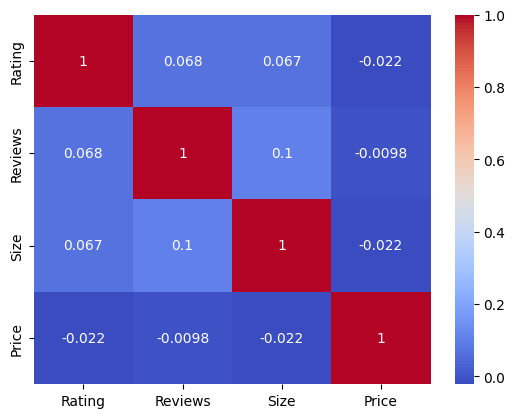

In [488]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


## 11. How many apps exist for each type (free/paid) across different content ratings?

In [489]:
type_content_counts = df.groupby(['Content Rating', 'Type']).size().unstack(fill_value=0)
print(type_content_counts)


Type             Free  Paid
Content Rating             
Adults only 18+     3     0
Everyone         6868   552
Everyone 10+      364    33
Mature 17+        444    17
Teen             1039    45
Unrated             1     0


## 12. How many apps are compatible with Android version 4.x?

In [490]:
android_4x = df[df['Android Ver'].str.startswith('4', na=False)]
print("Number of apps compatible with Android 4.x:", android_4x.shape[0])


Number of apps compatible with Android 4.x: 7180
